<a href="https://colab.research.google.com/github/DarTS2701/Extracci-n-de-caracter-sticas/blob/main/EaluacionM2_extraccion_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [4]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [5]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving microretailer_mit_lift_lab.xlsx to microretailer_mit_lift_lab.xlsx


{'microretailer_mit_lift_lab.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [6]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [7]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [8]:
pd.options.display.max_columns = None

In [9]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head(2)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,145_number_direct_competitors,310_burnout,24_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,276_expected_days_informal_credit,35_interest_rate,36_credit_default_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,172_supplier_frequency,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,163_number_high_perishable_products,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,yes,no,no,2,0.0,POS system (i.e. computer + bar code scanner +...,4,NaN,yes,yes,2021-04-12,2.0,2.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,3.0,no,NaN,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Redes sociales,no,NaN,NaN,NaN,NaN,Software especializado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y 

# Filtro de 20 variables

In [10]:
filtro = Micro_Retailer.loc[:, ["_updated_by", "232_type_of_store", "184_store_devices", "5_change_store_space_last_year", "6_change_employees_average_salary_last_year", "49_inventory_records", "18_sales_records", "210_sales_channels", "189_payment_methods", "214_customer_relationship_tools", "33_credit_to_customers", "193_sales_planning_tools", "312_payment_of_utilities", "313_home_deliveries", "314_reception_delivery_packages", "42_willingness_share_inventory_data_suppliers", "185_place_orders_suppliers", "277_payment_method_suppliers", "157_frequency_organize_shelves", "249_technology_training"]]
filtro

,_updated_by,232_type_of_store,184_store_devices,5_change_store_space_last_year,6_change_employees_average_salary_last_year,49_inventory_records,18_sales_records,210_sales_channels,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers,193_sales_planning_tools,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,185_place_orders_suppliers,277_payment_method_suppliers,157_frequency_organize_shelves,249_technology_training
0,Salomon Abdala Perez,Tailor,POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,no,Software especializado,NaN,NaN,NaN,NaN,NaN,NaN,Semestralmente,NaN
1,Salomon Abdala Perez,Grocery store (aka. nanostore),Dataphone (i.e. card payments),Aumentó 15%,No cambió,No lo hago,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,no,NaN,NaN,NaN,NaN,NaN,NaN,Transferencia interbancaria,NaN,NaN
2,Salomon Abdala Perez,Grocery store (aka. nanostore),"Dataphone (i.e. card payments),POS system (i.e...",No cambió,No cambió,En Excel,Software especializado + computadora,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semanalmente,NaN
3,Salomon Abdala Perez,Grocery store (aka. nanostore),POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,Software especializado + computadora,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,no,Ninguna,NaN,NaN,NaN,NaN,NaN,NaN,Semanalmente,NaN
4,Salomon Abdala Perez,Grocery store (aka. nanostore),Smartphone,No cambió,No cambió,En papel,En papel,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mensualmente,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Emilio Garza,Micro-restaurant (aka. fondita),Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Francisco Adán,Micro-restaurant (aka. fondita),Analog cash register,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Corroboramos valores nulos
valores_nulos=filtro.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  2
5_change_store_space_last_year                    72
6_change_employees_average_salary_last_year       86
49_inventory_records                              61
18_sales_records                                  61
210_sales_channels                                89
189_payment_methods                               64
214_customer_relationship_tools                   76
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

# Sustitucion de valores nulos

In [12]:
data1=filtro.copy()

In [13]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  2
5_change_store_space_last_year                    72
6_change_employees_average_salary_last_year       86
49_inventory_records                              61
18_sales_records                                  61
210_sales_channels                                89
189_payment_methods                               64
214_customer_relationship_tools                   76
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [14]:
data1["184_store_devices"] =data1["184_store_devices"].fillna(method="bfill")

<ipython-input-14-870ef9f11800>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["184_store_devices"] =data1["184_store_devices"].fillna(method="bfill")


In [15]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                    72
6_change_employees_average_salary_last_year       86
49_inventory_records                              61
18_sales_records                                  61
210_sales_channels                                89
189_payment_methods                               64
214_customer_relationship_tools                   76
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [16]:
#Sustituir valores nulos por valores no nulos hacia adelante forward fill" ("ffill")
#Filtro por columnas
data1["5_change_store_space_last_year"] =data1["5_change_store_space_last_year"].fillna(method="ffill")

<ipython-input-16-5d997bd03fe4>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["5_change_store_space_last_year"] =data1["5_change_store_space_last_year"].fillna(method="ffill")


In [17]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year       86
49_inventory_records                              61
18_sales_records                                  61
210_sales_channels                                89
189_payment_methods                               64
214_customer_relationship_tools                   76
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [18]:
#Sustituir valores nulos por valores no nulos hacia adelante forward fill" ("ffill")
#Filtro por columnas
data1["6_change_employees_average_salary_last_year"] =data1["6_change_employees_average_salary_last_year"].fillna(method="ffill")

<ipython-input-18-d7c1dcdecf98>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["6_change_employees_average_salary_last_year"] =data1["6_change_employees_average_salary_last_year"].fillna(method="ffill")


In [19]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                              61
18_sales_records                                  61
210_sales_channels                                89
189_payment_methods                               64
214_customer_relationship_tools                   76
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [20]:
#Sustituir valores nulos por valores no nulos hacia adelante forward fill" ("ffill")
#Filtro por columnas
data1["49_inventory_records"] =data1["49_inventory_records"].fillna(method="ffill")

<ipython-input-20-465bf7a5c60f>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["49_inventory_records"] =data1["49_inventory_records"].fillna(method="ffill")


In [21]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                  61
210_sales_channels                                89
189_payment_methods                               64
214_customer_relationship_tools                   76
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [22]:
data1["18_sales_records"] =data1["18_sales_records"].fillna(method="ffill")

<ipython-input-22-6ab46124c8b7>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["18_sales_records"] =data1["18_sales_records"].fillna(method="ffill")


In [23]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                89
189_payment_methods                               64
214_customer_relationship_tools                   76
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [24]:
data1["210_sales_channels"] =data1["210_sales_channels"].fillna(method="ffill")

<ipython-input-24-198c2726262d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["210_sales_channels"] =data1["210_sales_channels"].fillna(method="ffill")


In [25]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                               64
214_customer_relationship_tools                   76
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [26]:
data1["189_payment_methods"] =data1["189_payment_methods"].fillna(method="ffill")

<ipython-input-26-7ca884dc0f4d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["189_payment_methods"] =data1["189_payment_methods"].fillna(method="ffill")


In [27]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                   76
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [28]:
data1["214_customer_relationship_tools"] =data1["214_customer_relationship_tools"].fillna(method="ffill")

<ipython-input-28-1a23487367f1>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["214_customer_relationship_tools"] =data1["214_customer_relationship_tools"].fillna(method="ffill")


In [29]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                            64
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [30]:
data1["33_credit_to_customers"] =data1["33_credit_to_customers"].fillna(method="ffill")

<ipython-input-30-19f5139e3e9c>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["33_credit_to_customers"] =data1["33_credit_to_customers"].fillna(method="ffill")


In [31]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                          89
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [32]:
data1["193_sales_planning_tools"] =data1["193_sales_planning_tools"].fillna(method="ffill")

<ipython-input-32-f7c7a15c271f>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["193_sales_planning_tools"] =data1["193_sales_planning_tools"].fillna(method="ffill")


In [33]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                           0
312_payment_of_utilities                         105
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [34]:
data1["312_payment_of_utilities"] =data1["312_payment_of_utilities"].fillna("No opinaron")

In [35]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                           0
312_payment_of_utilities                           0
313_home_deliveries                              113
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [36]:
data1["313_home_deliveries"] = data1["313_home_deliveries"].fillna("No utilizan el servicio")

In [37]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                           0
312_payment_of_utilities                           0
313_home_deliveries                                0
314_reception_delivery_packages                  103
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [38]:
data1["314_reception_delivery_packages"] =data1["314_reception_delivery_packages"].fillna(method="bfill")

<ipython-input-38-06ae2bcf46e9>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["314_reception_delivery_packages"] =data1["314_reception_delivery_packages"].fillna(method="bfill")


In [39]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                           0
312_payment_of_utilities                           0
313_home_deliveries                                0
314_reception_delivery_packages                    8
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [40]:
data1["314_reception_delivery_packages"] =data1["314_reception_delivery_packages"].fillna(method="ffill")

<ipython-input-40-a267177c0b82>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["314_reception_delivery_packages"] =data1["314_reception_delivery_packages"].fillna(method="ffill")


In [41]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                           0
312_payment_of_utilities                           0
313_home_deliveries                                0
314_reception_delivery_packages                    0
42_willingness_share_inventory_data_suppliers     91
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [42]:
data1["42_willingness_share_inventory_data_suppliers"] =data1["42_willingness_share_inventory_data_suppliers"].fillna(method="ffill")

<ipython-input-42-1719f0557348>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["42_willingness_share_inventory_data_suppliers"] =data1["42_willingness_share_inventory_data_suppliers"].fillna(method="ffill")


In [43]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                           0
312_payment_of_utilities                           0
313_home_deliveries                                0
314_reception_delivery_packages                    0
42_willingness_share_inventory_data_suppliers      6
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [44]:
data1["42_willingness_share_inventory_data_suppliers"] =data1["42_willingness_share_inventory_data_suppliers"].fillna(method="bfill")

<ipython-input-44-7bd290d17d52>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["42_willingness_share_inventory_data_suppliers"] =data1["42_willingness_share_inventory_data_suppliers"].fillna(method="bfill")


In [45]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                           0
312_payment_of_utilities                           0
313_home_deliveries                                0
314_reception_delivery_packages                    0
42_willingness_share_inventory_data_suppliers      0
185_place_orders_suppliers                       100
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [46]:
data1["185_place_orders_suppliers"] =data1["185_place_orders_suppliers"].fillna(method="ffill")

<ipython-input-46-33b83aff84f1>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["185_place_orders_suppliers"] =data1["185_place_orders_suppliers"].fillna(method="ffill")


In [47]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                           0
312_payment_of_utilities                           0
313_home_deliveries                                0
314_reception_delivery_packages                    0
42_willingness_share_inventory_data_suppliers      0
185_place_orders_suppliers                        10
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [48]:
data1["185_place_orders_suppliers"] =data1["185_place_orders_suppliers"].fillna(method="bfill")

<ipython-input-48-7c1799de64ec>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["185_place_orders_suppliers"] =data1["185_place_orders_suppliers"].fillna(method="bfill")


In [49]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
5_change_store_space_last_year                     0
6_change_employees_average_salary_last_year        0
49_inventory_records                               0
18_sales_records                                   0
210_sales_channels                                 0
189_payment_methods                                0
214_customer_relationship_tools                    0
33_credit_to_customers                             0
193_sales_planning_tools                           0
312_payment_of_utilities                           0
313_home_deliveries                                0
314_reception_delivery_packages                    0
42_willingness_share_inventory_data_suppliers      0
185_place_orders_suppliers                         0
277_payment_method_suppliers                     103
157_frequency_organize_shelves                

In [50]:
data1["277_payment_method_suppliers"] =data1["277_payment_method_suppliers"].fillna(method="bfill")

<ipython-input-50-6fc559277f56>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["277_payment_method_suppliers"] =data1["277_payment_method_suppliers"].fillna(method="bfill")


In [51]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                       0
232_type_of_store                                 0
184_store_devices                                 0
5_change_store_space_last_year                    0
6_change_employees_average_salary_last_year       0
49_inventory_records                              0
18_sales_records                                  0
210_sales_channels                                0
189_payment_methods                               0
214_customer_relationship_tools                   0
33_credit_to_customers                            0
193_sales_planning_tools                          0
312_payment_of_utilities                          0
313_home_deliveries                               0
314_reception_delivery_packages                   0
42_willingness_share_inventory_data_suppliers     0
185_place_orders_suppliers                        0
277_payment_method_suppliers                      5
157_frequency_organize_shelves                   75
249_technolo

In [52]:
data1["277_payment_method_suppliers"] =data1["277_payment_method_suppliers"].fillna(method="ffill")

<ipython-input-52-5e5a04e6de2e>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["277_payment_method_suppliers"] =data1["277_payment_method_suppliers"].fillna(method="ffill")


In [53]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                       0
232_type_of_store                                 0
184_store_devices                                 0
5_change_store_space_last_year                    0
6_change_employees_average_salary_last_year       0
49_inventory_records                              0
18_sales_records                                  0
210_sales_channels                                0
189_payment_methods                               0
214_customer_relationship_tools                   0
33_credit_to_customers                            0
193_sales_planning_tools                          0
312_payment_of_utilities                          0
313_home_deliveries                               0
314_reception_delivery_packages                   0
42_willingness_share_inventory_data_suppliers     0
185_place_orders_suppliers                        0
277_payment_method_suppliers                      0
157_frequency_organize_shelves                   75
249_technolo

In [54]:
data1["157_frequency_organize_shelves"] =data1["157_frequency_organize_shelves"].fillna(method="ffill")

<ipython-input-54-96c2074ea227>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["157_frequency_organize_shelves"] =data1["157_frequency_organize_shelves"].fillna(method="ffill")


In [55]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                       0
232_type_of_store                                 0
184_store_devices                                 0
5_change_store_space_last_year                    0
6_change_employees_average_salary_last_year       0
49_inventory_records                              0
18_sales_records                                  0
210_sales_channels                                0
189_payment_methods                               0
214_customer_relationship_tools                   0
33_credit_to_customers                            0
193_sales_planning_tools                          0
312_payment_of_utilities                          0
313_home_deliveries                               0
314_reception_delivery_packages                   0
42_willingness_share_inventory_data_suppliers     0
185_place_orders_suppliers                        0
277_payment_method_suppliers                      0
157_frequency_organize_shelves                    0
249_technolo

In [56]:
data1["249_technology_training"] = data1["249_technology_training"].fillna("No lo veo necesario")

In [57]:
valores_nulos=data1.isnull().sum()
valores_nulos

_updated_by                                      0
232_type_of_store                                0
184_store_devices                                0
5_change_store_space_last_year                   0
6_change_employees_average_salary_last_year      0
49_inventory_records                             0
18_sales_records                                 0
210_sales_channels                               0
189_payment_methods                              0
214_customer_relationship_tools                  0
33_credit_to_customers                           0
193_sales_planning_tools                         0
312_payment_of_utilities                         0
313_home_deliveries                              0
314_reception_delivery_packages                  0
42_willingness_share_inventory_data_suppliers    0
185_place_orders_suppliers                       0
277_payment_method_suppliers                     0
157_frequency_organize_shelves                   0
249_technology_training        

# Aplicar métodos (Desviación Estándar o Rango Intercuartílico) para eliminar Outliers del dataframe (No se emplearon por que se utilizaron solo variables cualitativas)



# Extraer características a partir de aplicar un análisis univariado

In [58]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(data1)

                          _updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3                        Emilio Garza         13    0.076023         0.368421
4                    Benjamin Barbosa         13    0.076023         0.444444
5                     Pedro Contreras         12    0.070175         0.514620
6                      Eduardo Zárate          9    0.052632         0.567251
7                    Alejandro Matias          8    0.046784         0.614035
8                     Harry Hernández          7    0.040936         0.654971
9                      Francisco Adán          7    0.040936         0.695906
10                      Hiram Jiménez          6    0.035088         0.730994
11                       Ismael López          6    0.035088    

In [59]:
table1= freq_tbl(data1['_updated_by'])
table1

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [60]:
Filtro= table1[table1['frequency']>4]
Filtro

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [61]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('_updated_by')
Filtro_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


<Axes: ylabel='frequency'>

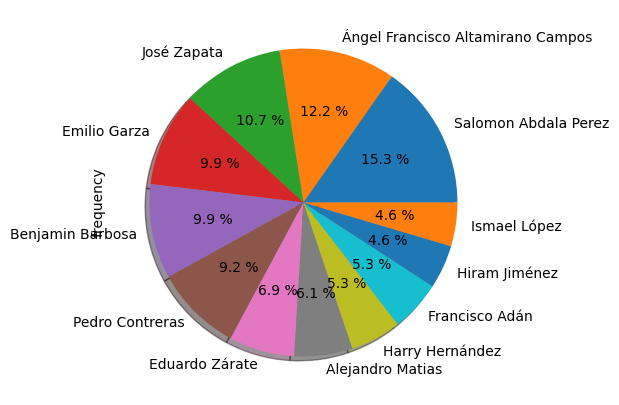

In [62]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [63]:
table2= freq_tbl(data1['232_type_of_store'])
table2

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [64]:
Filtro2= table2[table2['frequency']>5]
Filtro2

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035


In [65]:
#Ajusto el indice de mi dataframe
Filtro2_index= Filtro2.set_index('232_type_of_store')
Filtro2_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035


<Axes: ylabel='frequency'>

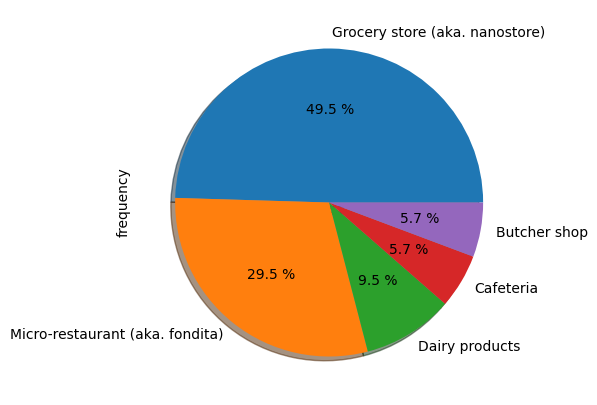

In [66]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro2_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [67]:
table3= freq_tbl(data1['184_store_devices'])
table3

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,"Analog cash register,Security cameras,Smartphone",5,0.029240,0.678363
9,Dataphone (i.e. card payments),4,0.023392,0.701754


In [68]:
Filtro3= table3[table2['frequency']>3]
Filtro3

<ipython-input-68-722da5609070>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Filtro3= table3[table2['frequency']>3]


,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643


In [69]:
Filtro3_index= Filtro3.set_index('184_store_devices')
Filtro3_index

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643


<Axes: ylabel='frequency'>

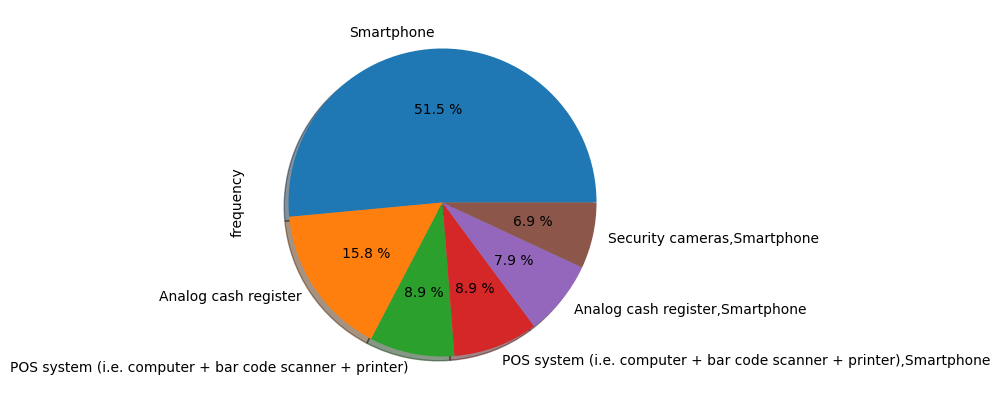

In [70]:
#Realizamos grafico de área del dataframe filtrado
Filtro3_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [71]:
table4= freq_tbl(data1['5_change_store_space_last_year'])
table4

,5_change_store_space_last_year,frequency,percentage,cumulative_perc
0,No cambió,132,0.771930,0.771930
1,Aumentó 25%,13,0.076023,0.847953
2,Disminuyó 15%,11,0.064327,0.912281
3,Aumentó 15%,4,0.023392,0.935673
4,Aumentó 50% o más,4,0.023392,0.959064
5,Disminuyó 25%,4,0.023392,0.982456
6,Disminuyó 50% o más,3,0.017544,1.000000


In [72]:
Filtro4= table4[table4['frequency']>3]


In [73]:
Filtro4_index= Filtro4.set_index('5_change_store_space_last_year')
Filtro4_index

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,132,0.771930,0.771930
Aumentó 25%,13,0.076023,0.847953
Disminuyó 15%,11,0.064327,0.912281
Aumentó 15%,4,0.023392,0.935673
Aumentó 50% o más,4,0.023392,0.959064
Disminuyó 25%,4,0.023392,0.982456


<Axes: ylabel='frequency'>

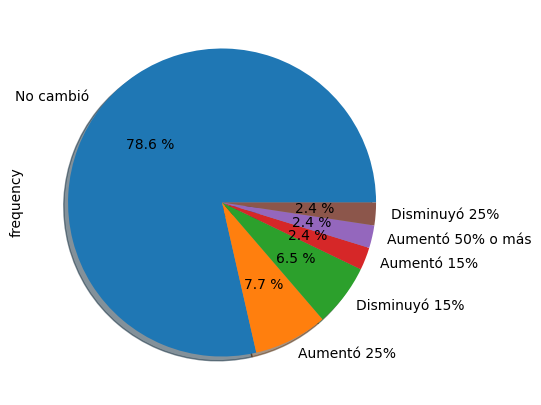

In [74]:
#Realizamos grafico de área del dataframe filtrado
Filtro4_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [75]:

table5= freq_tbl(data1['6_change_employees_average_salary_last_year'])
table5

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,No cambió,92,0.538012,0.538012
1,Aumentó 15%,21,0.122807,0.660819
2,Disminuyó 15%,19,0.111111,0.771930
3,Aumentó 50% o más,16,0.093567,0.865497
4,40,9,0.052632,0.918129
5,Aumentó 25%,7,0.040936,0.959064
6,Disminuyó 25%,3,0.017544,0.976608
7,Dependiente,1,0.005848,0.982456
8,Disminuyó 50% o más,1,0.005848,0.988304
9,0,1,0.005848,0.994152


In [76]:
Filtro5= table5[table5['frequency']>3]

In [129]:
Filtro5_index= Filtro5.set_index('6_change_employees_average_salary_last_year')
Filtro5_index

,frequency,percentage,cumulative_perc
6_change_employees_average_salary_last_year,,,
No cambió,92,0.538012,0.538012
Aumentó 15%,21,0.122807,0.660819
Disminuyó 15%,19,0.111111,0.771930
Aumentó 50% o más,16,0.093567,0.865497
40,9,0.052632,0.918129
Aumentó 25%,7,0.040936,0.959064


<Axes: ylabel='frequency'>

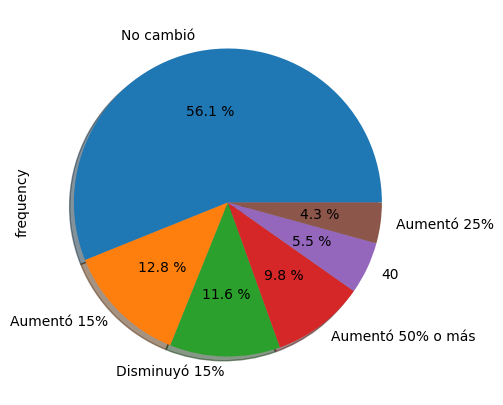

In [78]:
Filtro5_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [79]:
table6= freq_tbl(data1['49_inventory_records'])
table6

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,63,0.368421,0.368421
1,No lo hago,36,0.210526,0.578947
2,En Excel,35,0.204678,0.783626
3,Software especializado + computadora,24,0.140351,0.923977
4,"En Excel,En papel",7,0.040936,0.964912
5,"En papel,Mental",3,0.017544,0.982456
6,Mentalmente,1,0.005848,0.988304
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [80]:
Filtro6= table6[table6['frequency']>3]

In [130]:
Filtro6_index= Filtro6.set_index('49_inventory_records')
Filtro6_index

,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,63,0.368421,0.368421
No lo hago,36,0.210526,0.578947
En Excel,35,0.204678,0.783626
Software especializado + computadora,24,0.140351,0.923977
"En Excel,En papel",7,0.040936,0.964912


<Axes: xlabel='49_inventory_records'>

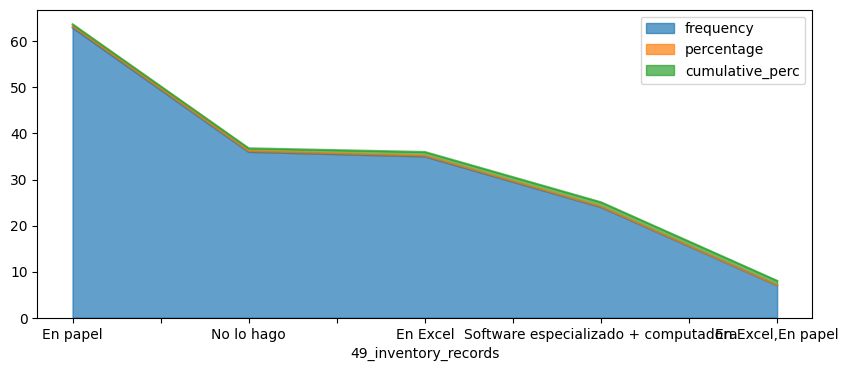

In [82]:
Filtro6_index.plot(kind='area', figsize=(10,4),alpha = 0.7)

In [83]:
table7= freq_tbl(data1['18_sales_records'])
table7

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,79,0.461988,0.461988
1,Software especializado + computadora,25,0.146199,0.608187
2,No lo hago,20,0.116959,0.725146
3,En Excel,20,0.116959,0.842105
4,Caja registradora (análoga),6,0.035088,0.877193
5,"En Excel,En papel",6,0.035088,0.912281
6,Contadora,5,0.029240,0.941520
7,"Aplicación móvil (i.e. App) + smartphone,Softw...",3,0.017544,0.959064
8,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.964912
9,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.970760


In [84]:
Filtro7= table7[table7['frequency']>3]

In [131]:
Filtro7_index= Filtro7.set_index('18_sales_records')
Filtro7_index

,frequency,percentage,cumulative_perc
18_sales_records,,,
En papel,79,0.461988,0.461988
Software especializado + computadora,25,0.146199,0.608187
No lo hago,20,0.116959,0.725146
En Excel,20,0.116959,0.842105
Caja registradora (análoga),6,0.035088,0.877193
"En Excel,En papel",6,0.035088,0.912281
Contadora,5,0.029240,0.941520


<Axes: ylabel='frequency'>

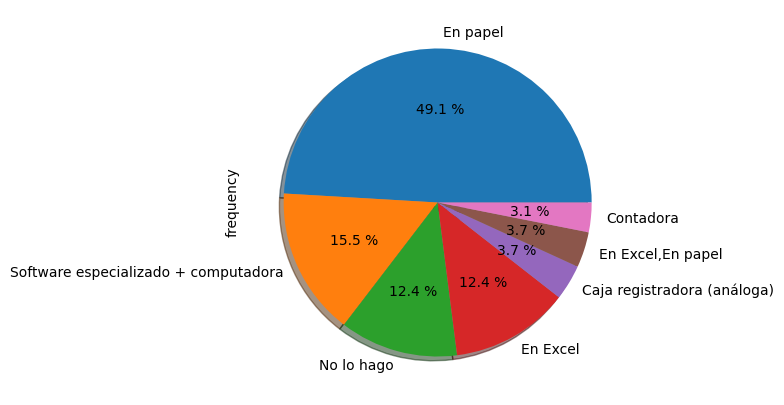

In [86]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro7_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [87]:
table8= freq_tbl(data1['210_sales_channels'])
table8

,210_sales_channels,frequency,percentage,cumulative_perc
0,WhatsApp,26,0.152047,0.152047
1,Llamada a Teléfono fijo,19,0.111111,0.263158
2,"Redes sociales (e.g. Facebook, Instagram),What...",17,0.099415,0.362573
3,"Redes sociales (e.g. Facebook, Instagram)",16,0.093567,0.456140
4,Llamada a Teléfono celular,14,0.081871,0.538012
5,"Llamada a Teléfono celular,Redes sociales (e.g...",14,0.081871,0.619883
6,"Llamada a Teléfono celular,WhatsApp",8,0.046784,0.666667
7,conocidos paquetes cerrados,7,0.040936,0.707602
8,Página web propia,6,0.035088,0.742690
9,"Llamada a Teléfono fijo,Redes sociales (e.g. F...",5,0.029240,0.771930


In [88]:
Filtro8= table8[table8['frequency']>3]


In [132]:
Filtro8_index= Filtro8.set_index('210_sales_channels')
Filtro8_index

,frequency,percentage,cumulative_perc
210_sales_channels,,,
WhatsApp,26,0.152047,0.152047
Llamada a Teléfono fijo,19,0.111111,0.263158
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",17,0.099415,0.362573
"Redes sociales (e.g. Facebook, Instagram)",16,0.093567,0.456140
Llamada a Teléfono celular,14,0.081871,0.538012
"Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp",14,0.081871,0.619883
"Llamada a Teléfono celular,WhatsApp",8,0.046784,0.666667
conocidos paquetes cerrados,7,0.040936,0.707602
Página web propia,6,0.035088,0.742690


<Axes: ylabel='frequency'>

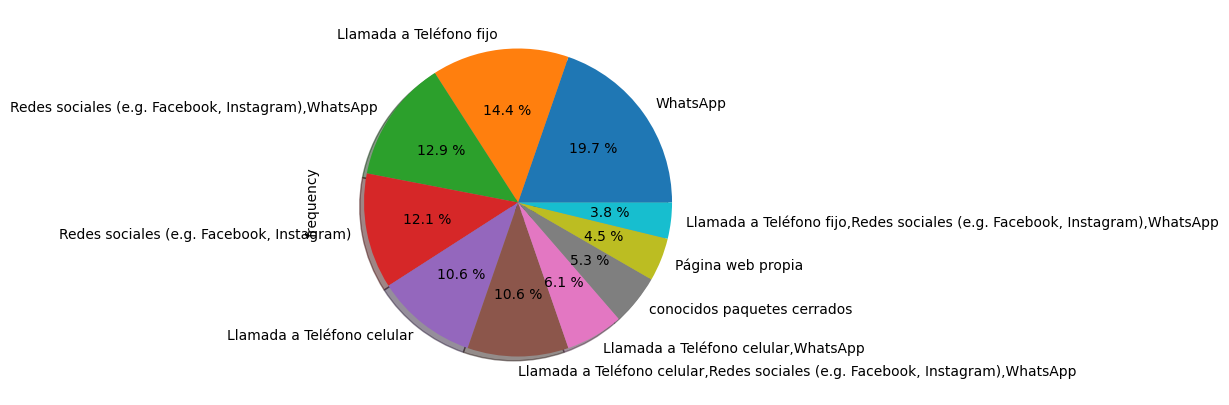

In [90]:
Filtro8_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [91]:
table9= freq_tbl(data1['189_payment_methods'])
table9

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,69,0.403509,0.403509
1,"Efectivo,Tarjeta de débito y/o crédito",37,0.216374,0.619883
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",35,0.204678,0.824561
3,"Efectivo,Transferencia interbancaria",26,0.152047,0.976608
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",2,0.011696,0.988304
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [134]:
Filtro9= table9[table9['frequency']>13]


In [135]:
Filtro9_index= Filtro9.set_index('189_payment_methods')
Filtro9_index

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Efectivo,69,0.403509,0.403509
"Efectivo,Tarjeta de débito y/o crédito",37,0.216374,0.619883
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",35,0.204678,0.824561
"Efectivo,Transferencia interbancaria",26,0.152047,0.976608


<Axes: ylabel='frequency'>

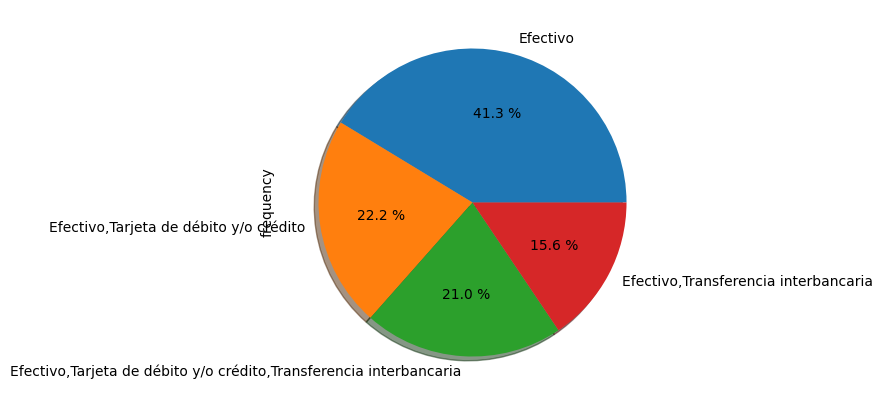

In [136]:
Filtro9_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [94]:
table10= freq_tbl(data1['214_customer_relationship_tools'])
table10


,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,45,0.263158,0.263158
1,Ninguna,39,0.228070,0.491228
2,Aplicación móvil,36,0.210526,0.701754
3,"Aplicación móvil,Redes sociales",15,0.087719,0.789474
4,Publicidad,14,0.081871,0.871345
5,Cuaderno,13,0.076023,0.947368
6,Teléfono,2,0.011696,0.959064
7,Físico,2,0.011696,0.970760
8,"Cuaderno,Redes sociales",1,0.005848,0.976608
9,"Aplicación móvil,De frente",1,0.005848,0.982456


In [137]:
Filtro10= table10[table10['frequency']>5]
Filtro10_index= Filtro10.set_index('214_customer_relationship_tools')
Filtro10_index

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Redes sociales,45,0.263158,0.263158
Ninguna,39,0.228070,0.491228
Aplicación móvil,36,0.210526,0.701754
"Aplicación móvil,Redes sociales",15,0.087719,0.789474
Publicidad,14,0.081871,0.871345
Cuaderno,13,0.076023,0.947368


<Axes: ylabel='frequency'>

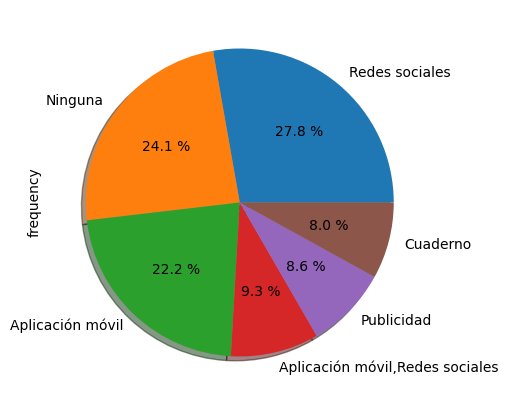

In [96]:
Filtro10_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [97]:
table11= freq_tbl(data1['33_credit_to_customers'])
table11

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,117,0.684211,0.684211
1,yes,54,0.315789,1.000000


In [98]:
Filtro11= table11[table11['frequency']>=0]
Filtro11

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,117,0.684211,0.684211
1,yes,54,0.315789,1.000000


In [147]:
Filtro11_index= Filtro11.set_index('33_credit_to_customers')
Filtro11_index

,frequency,percentage,cumulative_perc
33_credit_to_customers,,,
no,117,0.684211,0.684211
yes,54,0.315789,1.000000


<Axes: ylabel='frequency'>

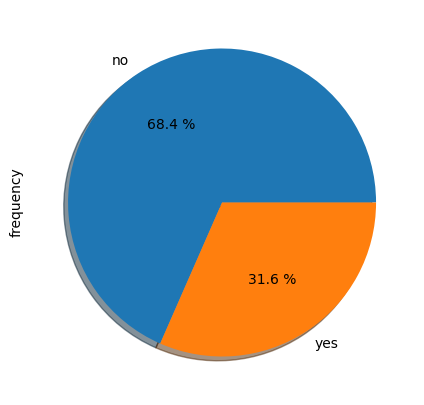

In [100]:
Filtro11_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [101]:
table12= freq_tbl(data1['193_sales_planning_tools'])
table12

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,71,0.415205,0.415205
1,Cuaderno,46,0.269006,0.684211
2,Excel,17,0.099415,0.783626
3,Aplicación móvil,10,0.058480,0.842105
4,Software especializado,10,0.058480,0.900585
5,"Cuaderno,Excel",3,0.017544,0.918129
6,"Excel,Software especializado",3,0.017544,0.935673
7,"Cuaderno,Ninguna",2,0.011696,0.947368
8,Mental,1,0.005848,0.953216
9,Por temporada de pan,1,0.005848,0.959064


In [102]:
Filtro12= table12[table12['frequency']>3]

In [138]:
Filtro12_index= Filtro12.set_index('193_sales_planning_tools')
Filtro12_index

,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
Ninguna,71,0.415205,0.415205
Cuaderno,46,0.269006,0.684211
Excel,17,0.099415,0.783626
Aplicación móvil,10,0.058480,0.842105
Software especializado,10,0.058480,0.900585


<Axes: ylabel='frequency'>

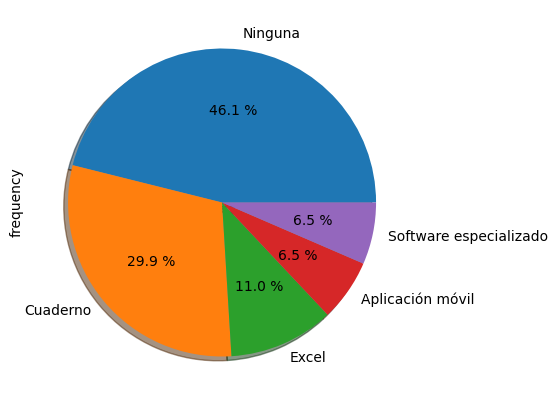

In [104]:
Filtro12_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [105]:
table13= freq_tbl(data1['312_payment_of_utilities'])
table13

,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,No opinaron,105,0.614035,0.614035
1,Totalmente en desacuerdo,46,0.269006,0.883041
2,Totalmente de acuerdo,9,0.052632,0.935673
3,Algo de acuerdo,5,0.029240,0.964912
4,Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
5,Algo en desacuerdo,2,0.011696,1.000000


In [139]:
Filtro13= table13[table13['frequency']>1]
Filtro13_index= Filtro13.set_index('312_payment_of_utilities')
Filtro13_index

,frequency,percentage,cumulative_perc
312_payment_of_utilities,,,
No opinaron,105,0.614035,0.614035
Totalmente en desacuerdo,46,0.269006,0.883041
Totalmente de acuerdo,9,0.052632,0.935673
Algo de acuerdo,5,0.029240,0.964912
Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
Algo en desacuerdo,2,0.011696,1.000000


<Axes: ylabel='frequency'>

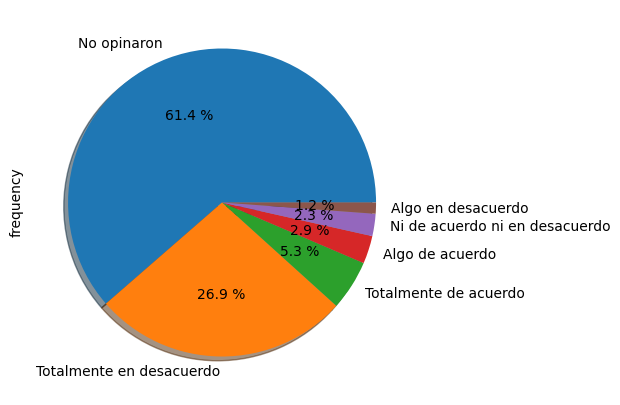

In [107]:
Filtro13_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [108]:
table14= freq_tbl(data1['313_home_deliveries'])
table14

,313_home_deliveries,frequency,percentage,cumulative_perc
0,No utilizan el servicio,113,0.660819,0.660819
1,Totalmente en desacuerdo,25,0.146199,0.807018
2,Totalmente de acuerdo,14,0.081871,0.888889
3,Algo de acuerdo,11,0.064327,0.953216
4,Algo en desacuerdo,5,0.029240,0.982456
5,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


In [140]:
Filtro14= table14[table14['frequency']>3]
Filtro14_index= Filtro14.set_index('313_home_deliveries')
Filtro14_index

,frequency,percentage,cumulative_perc
313_home_deliveries,,,
No utilizan el servicio,113,0.660819,0.660819
Totalmente en desacuerdo,25,0.146199,0.807018
Totalmente de acuerdo,14,0.081871,0.888889
Algo de acuerdo,11,0.064327,0.953216
Algo en desacuerdo,5,0.029240,0.982456


<Axes: ylabel='frequency'>

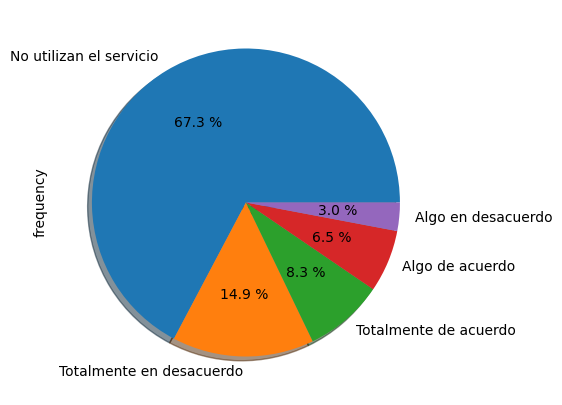

In [110]:
Filtro14_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [111]:
table15= freq_tbl(data1['314_reception_delivery_packages'])
table15

,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,107,0.625731,0.625731
1,Algo de acuerdo,29,0.169591,0.795322
2,Totalmente de acuerdo,24,0.140351,0.935673
3,Ni de acuerdo ni en desacuerdo,6,0.035088,0.970760
4,Algo en desacuerdo,5,0.029240,1.000000


In [141]:
Filtro15= table15[table15['frequency']>1]
Filtro15_index= Filtro15.set_index('314_reception_delivery_packages')
Filtro15_index

,frequency,percentage,cumulative_perc
314_reception_delivery_packages,,,
Totalmente en desacuerdo,107,0.625731,0.625731
Algo de acuerdo,29,0.169591,0.795322
Totalmente de acuerdo,24,0.140351,0.935673
Ni de acuerdo ni en desacuerdo,6,0.035088,0.970760
Algo en desacuerdo,5,0.029240,1.000000


<Axes: ylabel='frequency'>

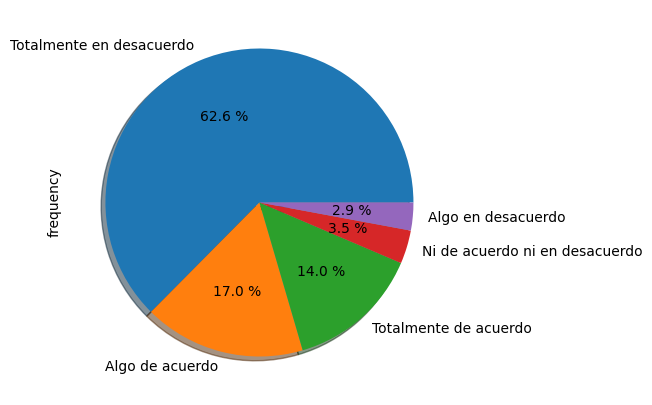

In [113]:
Filtro15_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [114]:
table16= freq_tbl(data1['42_willingness_share_inventory_data_suppliers'])
table16

,42_willingness_share_inventory_data_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,97,0.567251,0.567251
1,Algo de acuerdo,38,0.222222,0.789474
2,Algo en desacuerdo,17,0.099415,0.888889
3,Totalmente de acuerdo,11,0.064327,0.953216
4,Ni de acuerdo ni en desacuerdo,8,0.046784,1.000000


In [142]:
Filtro16= table16[table16['frequency']>3]
Filtro16_index= Filtro16.set_index('42_willingness_share_inventory_data_suppliers')
Filtro16_index

,frequency,percentage,cumulative_perc
42_willingness_share_inventory_data_suppliers,,,
Totalmente en desacuerdo,97,0.567251,0.567251
Algo de acuerdo,38,0.222222,0.789474
Algo en desacuerdo,17,0.099415,0.888889
Totalmente de acuerdo,11,0.064327,0.953216
Ni de acuerdo ni en desacuerdo,8,0.046784,1.000000


<Axes: ylabel='frequency'>

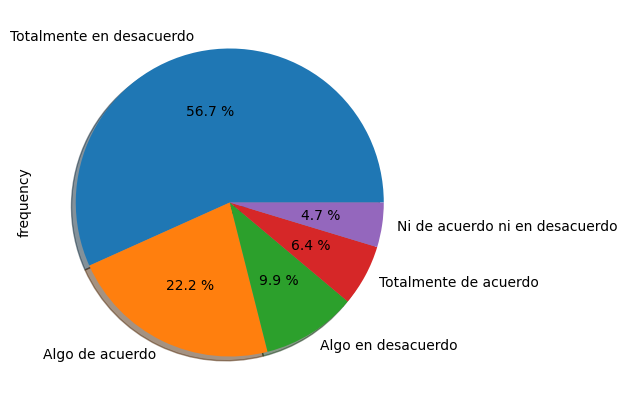

In [116]:
Filtro16_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [117]:
table17= freq_tbl(data1['185_place_orders_suppliers'])
table17

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,50,0.292398,0.292398
1,Mensajería instantánea (e.g. WhatsApp),21,0.122807,0.415205
2,Llamada telefónica,20,0.116959,0.532164
3,"En persona,Llamada telefónica",18,0.105263,0.637427
4,"En persona,Mensajería instantánea (e.g. WhatsApp)",16,0.093567,0.730994
5,"En persona,Llamada telefónica,Mensajería insta...",8,0.046784,0.777778
6,"Mensaje de texto (SMS),Mensajería instantánea ...",7,0.040936,0.818713
7,"Llamada telefónica,Mensajería instantánea (e.g...",6,0.035088,0.853801
8,"En persona,Página web del proveedor",6,0.035088,0.888889
9,Página web del proveedor,6,0.035088,0.923977


In [143]:
Filtro17= table17[table17['frequency']>9]
Filtro17_index= Filtro17.set_index('185_place_orders_suppliers')
Filtro17_index

,frequency,percentage,cumulative_perc
185_place_orders_suppliers,,,
En persona,50,0.292398,0.292398
Mensajería instantánea (e.g. WhatsApp),21,0.122807,0.415205
Llamada telefónica,20,0.116959,0.532164
"En persona,Llamada telefónica",18,0.105263,0.637427
"En persona,Mensajería instantánea (e.g. WhatsApp)",16,0.093567,0.730994


<Axes: ylabel='frequency'>

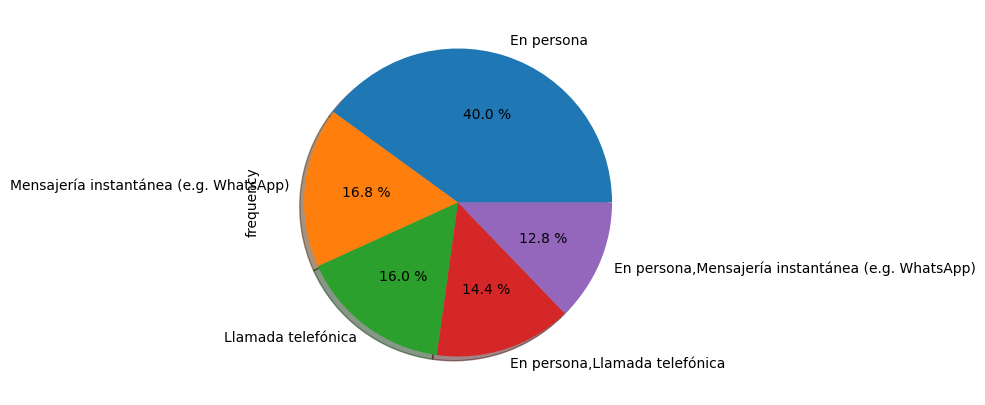

In [119]:
Filtro17_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [120]:
table18= freq_tbl(data1['277_payment_method_suppliers'])
table18

,277_payment_method_suppliers,frequency,percentage,cumulative_perc
0,Efectivo,113,0.660819,0.660819
1,Tarjeta de débito y/o crédito,19,0.111111,0.771930
2,Transferencia interbancaria,13,0.076023,0.847953
3,"Efectivo,Tarjeta de débito y/o crédito",13,0.076023,0.923977
4,"Efectivo,Transferencia interbancaria",10,0.058480,0.982456
5,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",3,0.017544,1.000000


In [144]:
Filtro18= table18[table18['frequency']>3]
Filtro18_index= Filtro18.set_index('277_payment_method_suppliers')
Filtro18_index

,frequency,percentage,cumulative_perc
277_payment_method_suppliers,,,
Efectivo,113,0.660819,0.660819
Tarjeta de débito y/o crédito,19,0.111111,0.771930
Transferencia interbancaria,13,0.076023,0.847953
"Efectivo,Tarjeta de débito y/o crédito",13,0.076023,0.923977
"Efectivo,Transferencia interbancaria",10,0.058480,0.982456


<Axes: ylabel='frequency'>

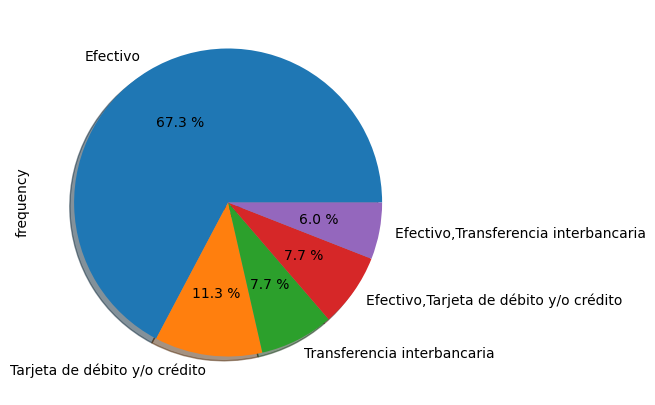

In [122]:
Filtro18_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [123]:
table19= freq_tbl(data1['157_frequency_organize_shelves'])
table19

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Diariamente,67,0.391813,0.391813
1,Semanalmente,66,0.385965,0.777778
2,Nunca,16,0.093567,0.871345
3,Mensualmente,12,0.070175,0.941520
4,Quincenalmente,5,0.029240,0.970760
5,Semestralmente,2,0.011696,0.982456
6,Anualmente,2,0.011696,0.994152
7,No se tiene,1,0.005848,1.000000


In [145]:
Filtro19= table19[table19['frequency']>3]
Filtro19_index= Filtro19.set_index('157_frequency_organize_shelves')
Filtro19_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Diariamente,67,0.391813,0.391813
Semanalmente,66,0.385965,0.777778
Nunca,16,0.093567,0.871345
Mensualmente,12,0.070175,0.941520
Quincenalmente,5,0.029240,0.970760


<Axes: ylabel='frequency'>

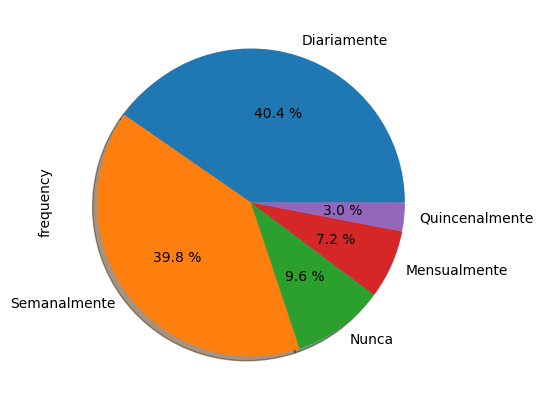

In [125]:
Filtro19_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [126]:
table20= freq_tbl(data1['249_technology_training'])
table20

,249_technology_training,frequency,percentage,cumulative_perc
0,No lo veo necesario,98,0.573099,0.573099
1,Totalmente de acuerdo,37,0.216374,0.789474
2,De acuerdo,21,0.122807,0.912281
3,Totalmente en desacuerdo,8,0.046784,0.959064
4,Ni de acuerdo ni en desacuerdo,6,0.035088,0.994152
5,En desacuerdo,1,0.005848,1.000000


In [146]:
Filtro20= table20[table20['frequency']>3]
Filtro20_index= Filtro20.set_index('249_technology_training')
Filtro20_index

,frequency,percentage,cumulative_perc
249_technology_training,,,
No lo veo necesario,98,0.573099,0.573099
Totalmente de acuerdo,37,0.216374,0.789474
De acuerdo,21,0.122807,0.912281
Totalmente en desacuerdo,8,0.046784,0.959064
Ni de acuerdo ni en desacuerdo,6,0.035088,0.994152


Text(0, 0.5, 'Frecuencia')

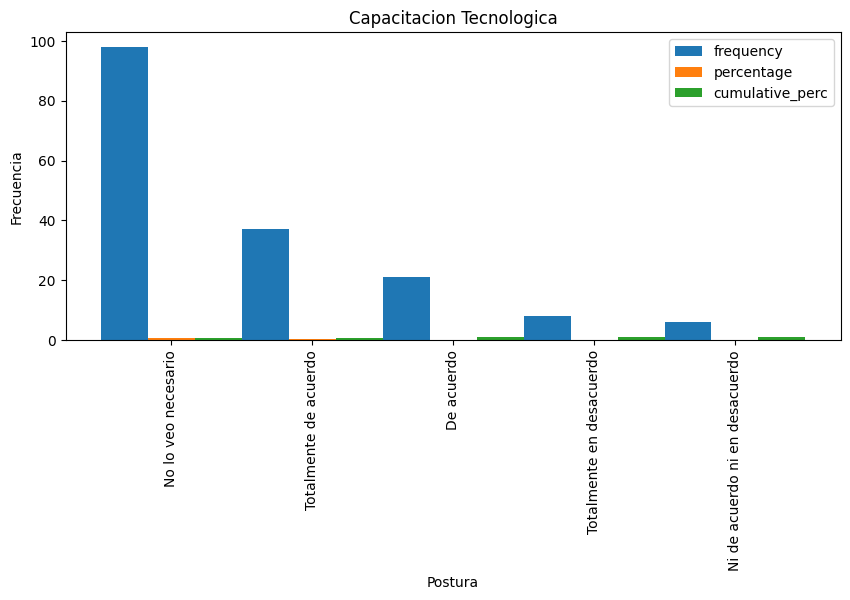

In [128]:
#Realizamos grafico de barras del dataframe filtrado
Filtro20_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Capacitacion Tecnologica')
plt.xlabel('Postura')
plt.ylabel('Frecuencia')